/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0168 - mean_absolute_error: 0.0988 - val_loss: 0.0062 - val_mean_absolute_error: 0.0580
Epoch 2/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0814 - val_loss: 0.0056 - val_mean_absolute_error: 0.0556
Epoch 3/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0670 - val_loss: 0.0064 - val_mean_absolute_error: 0.0626
Epoch 4/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0725 - val_loss: 0.0047 - val_mean_absolute_error: 0.0515
Epoch 5/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0714 - val_loss: 0.0039 - val_mean_absolute_error: 0.0456
Epoch 6/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0631 - val_loss: 0.0041 - val_mean_absolute_error: 0.0481
Epoch 7/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0648 - val_loss

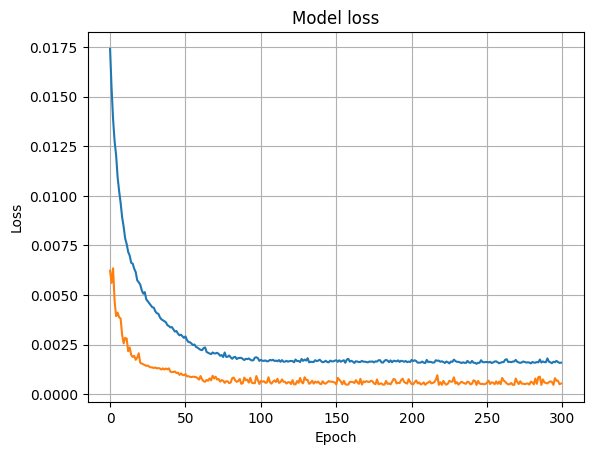

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[ 7.97579268 11.39405701  5.18490124  4.1968599   2.98659661  0.49199995
 21.21797192  8.88976118 11.4622466   5.18490124  9.33420506  9.11198381
  0.17024801  7.06182897  1.55411328  4.41908184  0.17024801  0.17024801
  0.17024801  4.56722717  5.55526954  0.17024801  0.17024801  0.17024801
  0.17024801  2.07263034  1.85040857  3.134744    1.77633505  0.56607356
  1.92448312  3.134744    0.17024801  0.17024801  3.32885036  4.34500626
  5.55526954  2.91252275  3.06066842  9.48235211  0.17024801  0.17024801
  0.17024801  0.17024801  4.6598758   1.70226135  1.85040857  0.17024801
  0.17024801  0.9812437   0.17024801  0.17024801  0.17024801  0.71422181
  0.17024801  0.17024801  0.17024801  0.17024801  0.17024801  0.17024801
  2.14670403  6.98775339  1.55411328  0.17024801  0.17024801  2.14670403
  5.7034159   2.91252275  6.91367987  6.69145861  6.69145861 19.69464767
 44.41458738 27.72248065  7.45727801  6.61738646  0.17024801  0.17024801
  0.17024801 

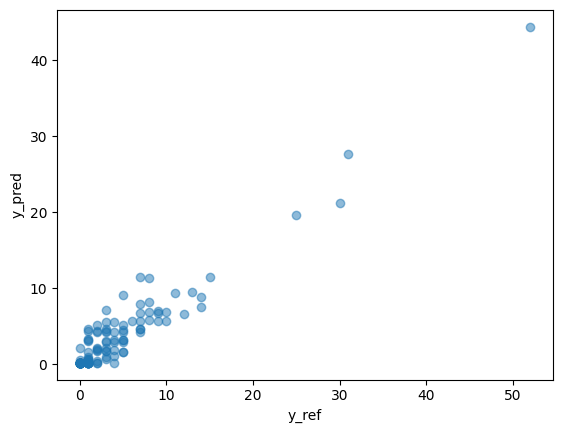

In [4]:
# モジュールのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.api.models import Sequential
from keras.api.layers import Dense
from sklearn.preprocessing import MinMaxScaler

# データの読み込み
f = open('wind_data_s.csv')
df = pd.read_csv(f)
xy = df.loc[:,['x1', 'x2', 'y']].values

# データの正規化
scaler = MinMaxScaler()
norm_xy = scaler.fit_transform(xy)
#print(norm_xy)

# 学習データと評価データの準備
norm_x = norm_xy[:, 0:2]
norm_y = norm_xy[:, 2]
x_train = norm_x[:304]
x_test = norm_x[304:440]
y_train = norm_y[:304]
y_test = norm_y[304:440]
#print(x_train)
#print(x_train.shape)
#print(y_train)
#print(y_train.shape)
#print(x_test)
#print(x_test.shape)
#print(y_test)
#print(y_test.shape)

# ニューラルネットワークの構築
input_nnode = 2    # 入力層のノード数
mid1_nnode = 4     # １番目の中間層のノード数
mid2_nnode = 2     # ２番目の中間層のノード数
output_nnode = 1   # 出力層のノード数
model = Sequential()
model.add(Dense(mid1_nnode, activation='relu', input_dim=input_nnode))
model.add(Dense(mid2_nnode, activation='relu'))
model.add(Dense(output_nnode, activation='linear'))
model.summary()

# ネットワークの最適化（学習）
model.compile(optimizer='adam',
   loss='mean_squared_error',
   metrics=['mean_absolute_error'])

train_history = model.fit(x_train, y_train,
   batch_size=8,
   epochs=300,
   verbose=1,
   validation_data=(x_test, y_test))

# 学習経過の表示
train_history.history.keys()
print(train_history.history)
len(train_history.history['loss'])

# 損失関数値のプロット
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

# 評価データによる推定と逆正規化
norm_y_pred = model.predict(x_test)
#print(norm_y_pred)
norm_xy_pred = np.hstack((x_test, norm_y_pred))
xy_pred = scaler.inverse_transform(norm_xy_pred)

# 最終的な推定値と正解値の表示
y_pred = xy_pred[:, 2]
y_ref = xy[304:440, 2]
print(y_pred)
print(y_ref)
fig, ax = plt.subplots()
ax.scatter(y_ref, y_pred, alpha=0.5)
ax.set_xlabel('y_ref')
ax.set_ylabel('y_pred')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0388 - mean_absolute_error: 0.1368 - val_loss: 0.0104 - val_mean_absolute_error: 0.0750
Epoch 2/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0311 - mean_absolute_error: 0.1108 - val_loss: 0.0090 - val_mean_absolute_error: 0.0680
Epoch 3/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0954 - val_loss: 0.0085 - val_mean_absolute_error: 0.0683
Epoch 4/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0249 - mean_absolute_error: 0.0995 - val_loss: 0.0076 - val_mean_absolute_error: 0.0647
Epoch 5/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0336 - mean_absolute_error: 0.1159 - val_loss: 0.0069 - val_mean_absolute_error: 0.0614
Epoch 6/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0268 - mean_absolute_error: 0.0999 - val_loss: 0.0067 - val_mean_absolute_error: 0.0612
Epoch 7/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0197 - mean_absolute_error: 0.0929 - val_loss

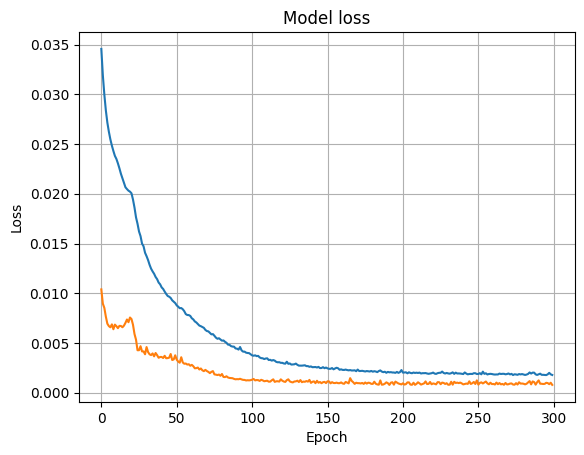

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[ 5.8541286  14.22834039  4.66043067  4.26949739  3.92265797  3.27677441
 17.49212408 10.01043844 13.78373885  4.91340137 10.49872804  9.47732568
  3.19965816  4.86296296  3.65002298  4.09058309  1.16363668 -0.31311512
  2.03277516  4.10049748  4.78103209  2.70777678  1.33596516  1.71017885
  1.90514374  3.34842348  3.450068    3.90220404  3.95955181  3.41713881
  3.39899898  2.94531107 -0.31761718  0.49120688  3.67392063  4.25428581
  4.71225643  3.9042275   3.95899248  9.75003195 -2.73371983 -1.37573242
 -1.37649465  1.69652462  4.10128713  3.63487172  3.54039431  0.79099131
  0.74026775  3.09613276  0.8530221   1.02393579  2.67259932  2.85131073
  2.30619431  2.07456589  1.73706508  2.11938906  2.63826084  2.19611049
  2.95308137  4.98562074  3.63933539  0.97578955  0.86387968  3.25890326
  4.60183811  3.9724493   5.02927589  5.17591357  5.25170279 22.63591456
 48.01124096 29.79757571  6.06568694  5.23447323  1.73272753  0.4231441
 -2.8463974  -

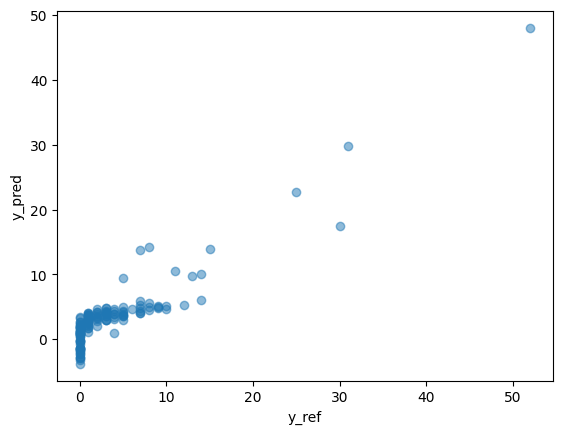

In [16]:
# データの読み込み
f = open('wind_data_sd.csv')
df = pd.read_csv(f)
xy = df.loc[:, ['x1', 'x2', 'x3', 'x4', 'y']].values


# データの正規化
scaler = MinMaxScaler()
norm_xy = scaler.fit_transform(xy)
#print(norm_xy)

# 学習データと評価データの準備
norm_x = norm_xy[:, 0:4]
norm_y = norm_xy[:, 4]
x_train = norm_x[:304]
x_test = norm_x[304:440]
y_train = norm_y[:304]
y_test = norm_y[304:440]
#print(x_train)
#print(x_train.shape)
#print(y_train)
#print(y_train.shape)
#print(x_test)
#print(x_test.shape)
#print(y_test)
#print(y_test.shape)

# ニューラルネットワークの構築
input_nnode = 4    # 入力層のノード数
mid1_nnode = 4     # １番目の中間層のノード数
mid2_nnode = 2     # ２番目の中間層のノード数
output_nnode = 1   # 出力層のノード数
model = Sequential()
model.add(Dense(mid1_nnode, activation='relu', input_dim=input_nnode))
model.add(Dense(mid2_nnode, activation='relu'))
model.add(Dense(output_nnode, activation='linear'))
model.summary()

# ネットワークの最適化（学習）
model.compile(optimizer='adam',
   loss='mean_squared_error',
   metrics=['mean_absolute_error'])

train_history = model.fit(x_train, y_train,
   batch_size=8,
   epochs=300,
   verbose=1,
   validation_data=(x_test, y_test))

# 学習経過の表示
train_history.history.keys()
print(train_history.history)
len(train_history.history['loss'])

# 損失関数値のプロット
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

# 評価データによる推定と逆正規化
norm_y_pred = model.predict(x_test)
#print(norm_y_pred)
norm_xy_pred = np.hstack((x_test, norm_y_pred))
xy_pred = scaler.inverse_transform(norm_xy_pred)

# 最終的な推定値と正解値の表示
y_pred = xy_pred[:, 4]
y_ref = xy[304:440, 4]
print(y_pred)
print(y_ref)
fig, ax = plt.subplots()
ax.scatter(y_ref, y_pred, alpha=0.5)
ax.set_xlabel('y_ref')
ax.set_ylabel('y_pred')
plt.show()

In [17]:
from tensorflow.keras.layers import LeakyReLU

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0379 - mean_absolute_error: 0.1433 - val_loss: 0.0153 - val_mean_absolute_error: 0.0897
Epoch 2/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0333 - mean_absolute_error: 0.1265 - val_loss: 0.0079 - val_mean_absolute_error: 0.0666
Epoch 3/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245 - mean_absolute_error: 0.1028 - val_loss: 0.0057 - val_mean_absolute_error: 0.0555
Epoch 4/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0832 - val_loss: 0.0064 - val_mean_absolute_error: 0.0645
Epoch 5/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.1041 - val_loss: 0.0050 - val_mean_absolute_error: 0.0509
Epoch 6/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0745 - val_loss: 0.0070 - val_mean_absolute_error: 0.0708
Epoch 7/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0841 - val_loss

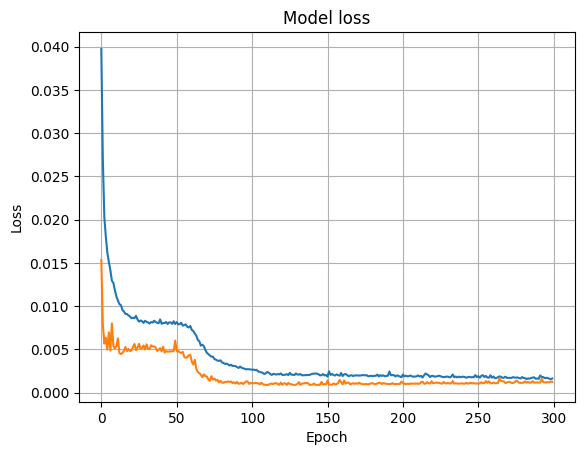

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[ 7.11695176 10.43753555  5.93671957  3.92939118  2.86860952  1.54573172
  5.81626073 14.55864942  8.61025384  5.60993925  7.37561652  5.24385366
  3.2113585   5.37901753  2.7301068   4.06509039 -0.4335013  -2.62591514
  2.29114655  5.56158976  5.86207712  1.65064448 -1.68206909  1.89600527
  0.97552839  3.84332393  3.56301153  4.33966932  1.39115101  1.8991659
  3.09686208  4.1001928  -3.13221914 -0.39850274  5.07529861  5.32951272
  6.12132931  4.47845101  4.61724094  9.07767001 -2.08157945 -2.48249018
 -3.78757155 -0.49937201  4.76144114  4.52812822  4.39674291  0.24521342
 -2.04410434  1.54782167 -0.35185146  0.12244734  1.87269643  2.79263763
  0.98934987  1.4820579   1.13199684  1.78285679  2.38884696 -0.44929826
  3.87143129  7.3050676   3.40042746 -0.9032062   0.70591351  4.07363525
  6.34947288  4.3262879   7.24758959  6.95507509  6.78303176 19.32358295
 45.17602468 26.86626983  7.099058    6.91137949 -0.8818557  -2.21994302
 -8.02956855 -

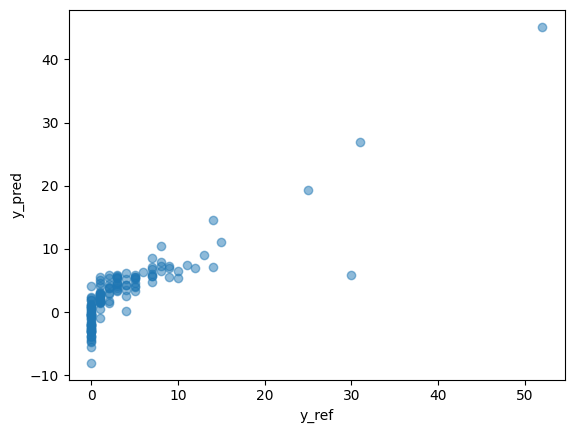

In [20]:
model = Sequential()
model.add(Dense(mid1_nnode))
model.add(LeakyReLU(alpha=0.2))       #活性化関数にLeakyReLUを使用
model.add(Dense(mid2_nnode))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(output_nnode, activation='linear'))
model.summary()

# ネットワークの最適化（学習）
model.compile(optimizer='adam',
   loss='mean_squared_error',
   metrics=['mean_absolute_error'])

train_history = model.fit(x_train, y_train,
   batch_size=8,
   epochs=300,
   verbose=1,
   validation_data=(x_test, y_test))

# 学習経過の表示
train_history.history.keys()
print(train_history.history)
len(train_history.history['loss'])

# 損失関数値のプロット
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

# 評価データによる推定と逆正規化
norm_y_pred = model.predict(x_test)
#print(norm_y_pred)
norm_xy_pred = np.hstack((x_test, norm_y_pred))
xy_pred = scaler.inverse_transform(norm_xy_pred)

# 最終的な推定値と正解値の表示
y_pred = xy_pred[:, 4]
y_ref = xy[304:440, 4]
print(y_pred)
print(y_ref)
fig, ax = plt.subplots()
ax.scatter(y_ref, y_pred, alpha=0.5)
ax.set_xlabel('y_ref')
ax.set_ylabel('y_pred')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0163 - mean_absolute_error: 0.0909 - val_loss: 0.0048 - val_mean_absolute_error: 0.0578
Epoch 2/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0709 - val_loss: 0.0075 - val_mean_absolute_error: 0.0756
Epoch 3/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0647 - val_loss: 0.0053 - val_mean_absolute_error: 0.0636
Epoch 4/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0499 - val_loss: 0.0031 - val_mean_absolute_error: 0.0428
Epoch 5/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0494 - val_loss: 0.0029 - val_mean_absolute_error: 0.0406
Epoch 6/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0499 - val_loss: 0.0026 - val_mean_absolute_error: 0.0354
Epoch 7/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0455 - val_loss

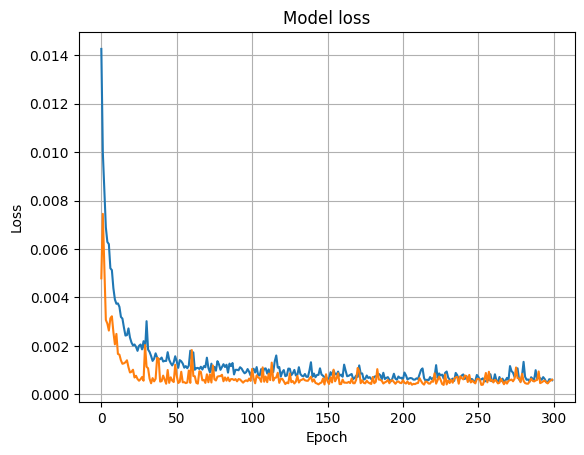

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[ 7.27840140e+00  9.94582829e+00  5.40283087e+00  2.75553112e+00
  2.00685594e+00  1.30606825e+00  1.70564184e+01  8.70644900e+00
  1.26126211e+01  4.56096590e+00  9.49189362e+00  3.45242390e+00
  2.06126244e+00  3.32846925e+00  1.63894876e+00  2.87829086e+00
  1.48744933e-01  4.83435385e-01  1.17978819e+00  5.15402979e+00
  6.14647996e+00  1.25778697e+00  3.23543780e-01  1.64742302e+00
  1.06866900e+00  2.11744871e+00  2.38358525e+00  3.03350288e+00
  1.60364448e+00  1.03483947e+00  1.84788936e+00  7.43391159e+00
  6.47155933e-01  9.35008667e-01  3.58090597e+00  6.19249514e+00
  7.93539068e+00  6.65180308e+00  5.61237672e+00  1.60020416e+01
  1.37852307e+00  1.19184943e+00  1.24571099e+00  2.47088289e+00
  5.09112504e+00  2.72584962e+00  2.44650953e+00 -5.29799797e-01
  9.60171148e-02  1.80924281e+00 -2.33988948e-01  1.19029380e+00
  1.56584481e+00  1.69166561e+00  1.00909350e+00  1.06343967e+00
  1.32700405e+00  1.50025275e+00  1.55078232e+00  9.

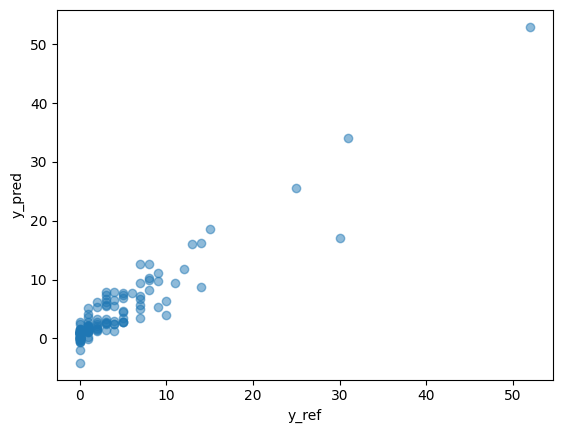

In [22]:
# ニューラルネットワークの構築
input_nnode = 2    # 入力層のノード数
mid1_nnode = 64     # １番目の中間層のノード数
mid2_nnode = 32     # ２番目の中間層のノード数
output_nnode = 1   # 出力層のノード数
model = Sequential()
model.add(Dense(mid1_nnode))
model.add(LeakyReLU(alpha=0.2))       #活性化関数にLeakyReLUを使用
model.add(Dense(mid2_nnode))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(output_nnode, activation='linear'))
model.summary()

# ネットワークの最適化（学習）
model.compile(optimizer='adam',
   loss='mean_squared_error',
   metrics=['mean_absolute_error'])

train_history = model.fit(x_train, y_train,
   batch_size=8,
   epochs=300,
   verbose=1,
   validation_data=(x_test, y_test))

# 学習経過の表示
train_history.history.keys()
print(train_history.history)
len(train_history.history['loss'])

# 損失関数値のプロット
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

# 評価データによる推定と逆正規化
norm_y_pred = model.predict(x_test)
#print(norm_y_pred)
norm_xy_pred = np.hstack((x_test, norm_y_pred))
xy_pred = scaler.inverse_transform(norm_xy_pred)

# 最終的な推定値と正解値の表示
y_pred = xy_pred[:, 4]
y_ref = xy[304:440, 4]
print(y_pred)
print(y_ref)
fig, ax = plt.subplots()
ax.scatter(y_ref, y_pred, alpha=0.5)
ax.set_xlabel('y_ref')
ax.set_ylabel('y_pred')
plt.show()